The SAT, or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year. The SAT has three sections, each of which is worth a maximum of 800 points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on [student SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) by high school, along with additional demographic data sets.

- [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
- [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City
- [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
- [AP test results](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
- [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
- [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

The dataframe `combined` contains all of the data we'll be using in our analysis.

## Import Libraries

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re

# Show all columns in output
pd.options.display.max_columns = None

# Show all values in columns
pd.options.display.max_colwidth = None

## Read in the Data

In [2]:
#create a string that holds the names of the files
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# create a dictionary that holds the data different datasets
data = {}

# loop through the list of file names
for file in data_files:
    
    # for each loop get the file using its relative path
    datum = pd.read_csv('../Dataset/{}'.format(file))
    
    # get just the name of the files
    file_name = file.replace('.csv', '')
    
    # append the file name and dataframe to the dictionary as key/value pairs
    data[file_name] = datum

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (`survey_all.txt` and `survey_d75.txt`), but we didn't read those files in because they're in a slightly more complex format.

The files are tab delimited and encoded with `Windows-1252` encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are `UTF-8` and `ASCII`. `Windows-1252` is rarely used, and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, here's a good [primer](http://kunststube.net/encoding/).

We'll need to specify the encoding and delimiter to the pandas `pandas.read_csv()` function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the [pandas.concat() function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

**`z = pd.concat([x,y], axis=0)`**

The code above will combine dataframes `x` and `y` by essentially appending `y` to the end of `x`. The combined dataframe `z` will have the number of rows in `x` plus the number of rows in `y`.

## Read in the Surveys

In [3]:
# Use the pandas.read_csv() function to read survey_all.txt into the variable all_survey
all_survey = pd.read_csv('../Dataset/survey_all.txt',
                         delimiter='\t', encoding='windows-1252')

# Use the pandas.read_csv() function to read survey_d75.txt into the variable d75_survey
d75_survey = pd.read_csv('../Dataset/survey_d75.txt',
                         delimiter='\t', encoding='windows-1252')

# Use the pandas concat() function with the keyword argument axis=0
#to combine d75_survey and all_survey into the dataframe survey.
survey = pd.concat([all_survey, d75_survey], axis=0, sort=True)
survey.head()

N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11  com_t_11  com_tot_11  d75     dbn  eng_p_11  eng_s_11  \
0       7.6       NaN       7.8         7.7    0  01M015       7.5       NaN   
1       7.6       NaN       8.5         8.1    0  01M019       7.6       NaN   
2       8.3       NaN       6.3         7.3    0  01M020       8.3       NaN   
3       8.2       5.9       6.2         6.7    0  01M034       8.0       6.5   
4       7.9       NaN       7.3         7.6    0  01M063       8.1       NaN   

   eng_t_11  eng_tot_11  highschool  nr_p  nr_s  nr_t  p_N_q10a  p_N_q10a_1  \
0       7.6         7.5         0.0   150     0    25      56.0         NaN   
1       8.9         8.2         0.0   269     0    33      76.0         NaN   
2       6.8         7.5         0.0   505     0    48     176.0         NaN   
3       6.8         7.1         0.0   301   163    40      95.0         NaN   
4       7.8         7.9         0.0   151     0    23      45.0         NaN   

   p_N_q10a_2  p_N_q10a_3  p_N_q10a_4  p_N_q10a_5  p_N_q10b  p_N_q10b_1  \
0         NaN         NaN         NaN         NaN      30.0         NaN   
1         NaN         NaN         NaN         NaN     105.0         NaN   
2         NaN         NaN         NaN         NaN     173.0         NaN   
3         NaN         NaN         NaN         NaN      74.0         NaN   
4         NaN         NaN         NaN         NaN      54.0         NaN   

   p_N_q10b_2  p_N_q10b_3  p_N_q10b_4  p_N_q10b_5  p_N_q10c  p_N_q10c_1  \
0         NaN         NaN         NaN         NaN       6.0         NaN   
1         NaN         NaN         NaN         NaN      22.0         NaN   
2         NaN         NaN         NaN         NaN      40.0         NaN   
3         NaN         NaN         NaN         NaN      19.0         NaN   
4         NaN         NaN         NaN         NaN      13.0         NaN   

   p_N_q10c_2  p_N_q10c_3  p_N_q10c_4  p_N_q10c_5  p_N_q10d  p_N_q10d_1  \
0         NaN         NaN         NaN         NaN      49.0         NaN   
1         NaN         NaN         NaN         NaN      99.0         NaN   
2         NaN         NaN         NaN         NaN     219.0         NaN   
3         NaN         NaN         NaN         NaN      79.0         NaN   
4         NaN         NaN         NaN         NaN      57.0         NaN   

   p_N_q10d_2  p_N_q10d_3  p_N_q10d_4  p_N_q10d_5  p_N_q10e  p_N_q10e_1  \
0         NaN         NaN         NaN         NaN       3.0         NaN   
1         NaN         NaN         NaN         NaN      23.0         NaN   
2         NaN         NaN         NaN         NaN      43.0         NaN   
3         NaN         NaN         NaN         NaN      17.0         NaN   
4         NaN         NaN         NaN         NaN      14.0         NaN   

   p_N_q10e_2  p_N_q10e_3  p_N_q10e_4  p_N_q10e_5  p_N_q10f  p_N_q10f_1  \
0         NaN         NaN         NaN         NaN       2.0         NaN   
1         NaN         NaN         NaN         NaN      16.0         NaN   
2         NaN         NaN         NaN         NaN      36.0         NaN   
3         NaN         NaN         NaN         NaN      15.0         NaN   
4         NaN         NaN         NaN         NaN      13.0         NaN   

   p_N_q10f_2  p_N_q10f_3  p_N_q10f_4  p_N_q10f_5  p_N_q10g  p_N_q10h  \
0         NaN         NaN         NaN         NaN      56.0      11.0   
1         NaN         NaN         NaN         NaN      75.0      33.0   
2         NaN         NaN         NaN         NaN     210.0      65.0   
3         NaN         NaN         NaN         NaN     102.0    

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Here's a preview of the data dictionary:
![walkthrough3](img\walkthrough3.png)
Based on the dictionary, it looks like these are the relevant columns:

`["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]`

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the `DBN`, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the `dbn` column into a new column called `DBN`. We can copy columns like this:

## Filter the survey DataFrame

In [4]:
# Copy the data from the dbn column of survey into a new column in survey called DBN.
survey['DBN'] = survey['dbn']

# Filter survey so it only contains the columns we listed above
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11",
        "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11",
        "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11",
        "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# Assign the dataframe survey to the key survey in the dictionary data
data['survey'] = survey[survey_fields]

data['survey']

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,8.2,6.4,5.5,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,7.7,7.6,6.4,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,7.8,7.7,7.2,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,7.8,6.7,6.5,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


## Add DBN Columns

Previous explororations of the data sets made us notice that some of them, like `class_size` and `hs_directory`, don't have a `DBN` column. `hs_directory` does have a `dbn` column, though, so we can just rename it.

However, `class_size` doesn't appear to have the column at all. Here are the first few rows of the data set:

In [5]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


From looking at these rows, we can tell that the `DBN` in the `sat_results` data is just a combination of the `CSD` and `SCHOOL CODE` columns in the `class_size` data. The main difference is that the `DBN` is padded, so that the `CSD` portion of it always consists of two digits. That means we'll need to add a leading `0` to the `CSD` if the `CSD` is less than two digits long. Here's a diagram illustrating what we need to do:
![walkthrough4](img\walkthrough4.png)
As you can see, whenever the `CSD` is less than two digits long, we need to add a leading `0`. We can accomplish this using the `pandas.Series.apply()` method, along with a custom function that:

- Takes in a number.
- Converts the number to a string using the `str()` function.
- Check the length of the string using the `len()` function.
- If the string is two digits long, returns the string.
- If the string is one digit long, adds a `0` to the front of the string, then returns it.

Once we've padded the `CSD`, we can use the addition operator (`+`) to combine the values in the `CSD` and `SCHOOL CODE` columns. Here's an example of how we would do this:

`dataframe["new_column"] = dataframe["column_one"] + dataframe["column_two"]`

And here's a diagram illustrating the basic concept:
![walkthrough5](img\walkthrough5.png)

In [6]:
# Copy the dbn column in hs_directory into a new column called DBN.
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# generate a custom function that fills values in a column.
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation

# Create a new column called padded_csd in the class_size data set
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)

# Use the addition operator (+) along with the padded_csd and SCHOOL CODE columns of class_size,
# then assign the result to the DBN column of class_size.
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

# Display the first few rows of class_size to double check the DBN column.
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score`, and `SAT Writing Avg. Score` columns in the `sat_results` data set from the object (string) data type to a numeric data type. We can use the [pandas.to_numeric() method](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_numeric.html) for the conversion. If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument `errors="coerce"` when we call `pandas.to_numeric()`, so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

After we perform the conversion, we can use the addition operator (`+`) to add all three columns together.

In [7]:
# Convert each of the columns that shows different sat test scores to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Add all the sat test scores together and assign to a new column called sat_score
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

## Convert Columns to Numeric

Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the `hs_directory` data set.

Let's take a look at the first few rows:

In [8]:
data['hs_directory']['Location 1'].head()

0                     50 Avenue\nX Brooklyn, NY 11223\n(40.589238098, -73.981746524)
1               284 Baltic Street\nBrooklyn, NY 11201\n(40.685451806, -73.993491465)
2    45 35 Van Dam Street\nLong Island City, NY 11101\n(40.744149536, -73.933626741)
3             509 West 129 Street\nNew York, NY 10027\n(40.815230365, -73.955201206)
4          8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(40.601989336, -73.762834323)
Name: Location 1, dtype: object

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field.

We want to extract the latitude, `40.8276026690005`, and the longitude, `-73.90447525699966`. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

We'll Write a function that:
- Takes in a string
- Uses the regular expression above to extract the coordinates
- Uses string manipulation functions to pull out the latitude
- Returns the latitude

Use the [Series.apply()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) method to apply the function across the `Location 1` column of `hs_directory`. Assign the result to the `lat` column of `hs_directory`.
Display the first few rows of `hs_directory` to verify the results.

In [9]:
# Create a function that gets the latitude
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# Create a finction that gets the longitude
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].strip().replace(")", "")
    return lon

# Use the Series.apply() method to apply the function across the Location 1 column of hs_directory.
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# Use the to_numeric() function to convert the lat and lon columns of hs_directory to numbers.
location_cols = ['lat', 'lon']

for location in location_cols:
    data['hs_directory'][location] = pd.to_numeric(data['hs_directory'][location],
                                                  errors='coerce')
    
# Check
data['hs_directory'][['lat', 'lon']].head()

,lat,lon
0,40.589238,-73.981747
1,40.685452,-73.993491
2,40.744150,-73.933627
3,40.815230,-73.955201
4,40.601989,-73.762834


## Condense some Data Sets

While the main data set we want to analyze, `sat_results`, has unique `DBN` values for every high school in New York City, other data sets aren't as clean. A single row in the `sat_results` data set may match multiple rows in the `class_size` data set, for example. This situation will create problems, because we don't know which of the multiple entries in the `class_size` data set we should combine with the single matching entry in `sat_results`. Here's a diagram that illustrates the problem:
![walkthrough6](img\walkthrough6.png)

In the diagram above, we can't just combine the rows from both data sets because there are several cases where multiple rows in `class_size` match a single row in `sat_results`.

To resolve this issue, we'll condense the `class_size`, `graduation`, and `demographics` data sets so that each `DBN` is unique.

The first data set that we'll condense is `class_size`.

In [10]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


As we can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

If we look at the unique values for `GRADE`, we get the following:

In [11]:
#Lets see the unique columns in class size
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'padded_csd', 'DBN'],
      dtype='object')

- The `GRADE` column has an extra white space after it
- The `padded_csd` column is in lower case whereas the other columns are in upper case. We'll convert this column to uppercase and remove the underscore
- Remove the excess space before and after the slash in `NUMBER OF STUDENTS / SEATS FILLED`

In [12]:
data['class_size'].columns = ['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE AND 9-12 ONLY)',
       'CORE COURSE (MS CORE AND 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS/SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'PADDED CSD', 'DBN']

# check
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE AND 9-12 ONLY),CORE COURSE (MS CORE AND 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS/SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,PADDED CSD,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


The change has been applied. Lets proceed with examining the unique values in the `GRADE` column:

In [13]:
data['class_size']['GRADE'].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Because we're dealing with high schools, we're only concerned with grades `9` through `12`. That means we only want to pick rows where the value in the `GRADE` column is `09-12`.

If we look at the unique values for `PROGRAM TYPE` column, we get the following:

In [14]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

In [15]:
# Create a new variable called class_size, and assign the value of data["class_size"] to it.
class_size = data['class_size']

# Get a new dataframe for class_size where GRADE  column only contains the value 09-12.
class_size = class_size[class_size['GRADE'] == '09-12']

# Get a new dataframe for class_size where PROGRAM TYPE column only contains the value GEN ED.
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

# Display the first five rows of class_size to verify.
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE AND 9-12 ONLY),CORE COURSE (MS CORE AND 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS/SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,PADDED CSD,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


As we see from above when we displayed `class_size`, `DBN` still isn't completely unique. This is due to the `CORE COURSE (MS CORE AND 9-12 ONLY)` and `CORE SUBJECT (MS CORE AND 9-12 ONLY)` columns.

`CORE COURSE (MS CORE AND 9-12 ONLY)` and `CORE SUBJECT (MS CORE AND 9-12 ONLY)` seem to pertain to different kinds of classes. For example, here are the unique values for `CORE SUBJECT (MS CORE AND 9-12 ONLY)`:

In [16]:
class_size['CORE SUBJECT (MS CORE AND 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.

In [17]:
# Find the average values for each numeric column associated with each DBN in class_size
# Use the pandas.DataFrame.groupby() method to group class_size by DBN.
# Use the agg() method on the resulting pandas.core.groupby object,
# along with the numpy.mean() function as an argument, to calculate the average of each group.
# Assign the result back to class_size
class_size = class_size.groupby('DBN').agg(np.mean)

#Reset the index to make DBN a column again.
#Use the pandas.DataFrame.reset_index() method, along with the keyword argument inplace=True.
class_size.reset_index(inplace = True)

# Assign class_size back to the class_size key of the data dictionary.
data['class_size'] = class_size

# Display the first few rows of data["class_size"] to verify that everything went okay
data['class_size'].head()

,index,DBN,CSD,NUMBER OF STUDENTS/SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Now that we've finished condensing `class_size`, let's condense `demographics`. The first few rows look like this:

In [18]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In this case, the only column that prevents a given `DBN` from being unique is `schoolyear`. We only want to select rows where `schoolyear` is `20112012`. This will give us the most recent year of data, and also match our `SAT` results data.

In [19]:
# schoolyear is actually an integer, so lets convert it to a string
data['demographics']['schoolyear'] = data['demographics']['schoolyear'].astype(str)

# check to see the unique school years
data['demographics']['schoolyear'].unique()

array(['20052006', '20062007', '20072008', '20082009', '20092010',
       '20102011', '20112012'], dtype=object)

In [20]:
# Filter demographics, only selecting rows in data["demographics"] where schoolyear is 20112012.
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == '20112012']

# Display the first few rows of data["demographics"] to verify that the filtering worked.
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,25,28,29,,,,,,,,20.0,10.6,40.0,21.2,23,7,12,6.3,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,52,46,46,,,,,,,,33.0,10.1,59.0,18.0,16,16,51,15.5,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,88,85,91,,,,,,,,128.0,20.4,97.0,15.5,49,31,190,30.4,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,45,28,40,55,55,56,,,,,34.0,8.5,106.0,26.4,59,16,22,5.5,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,31,26,30,,,,,,,,6.0,3.4,45.0,25.6,34,4,9,5.1,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


Finally, we'll need to condense the `graduation` data set. Here are the first few rows:

In [21]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


lets first see the values in these columns:

In [22]:
# print the unique values of Demographic column in the graduation dataset
print(data['graduation']['Demographic'].unique())

# print the unique values of Cohort column in the graduation dataset
data['graduation']['Cohort'].unique()

['Total Cohort' 'Asian' 'Male' 'Black' 'English Language Learners'
 'Hispanic' 'White' 'English Proficient Students'
 'Special Education Students' 'General Education Students' 'Female']


array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique in the `graduation` data. A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. In this case, we want to pick data from the most recent `Cohort` available, which is `2006`. We also want data from the full cohort, so we'll only pick rows where `Demographic` is `Total Cohort`.

In [23]:
# Filter graduation, only selecting rows where the Cohort column equals 2006.
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]

# Filter graduation, only selecting rows where the Demographic column equals Total Cohort.
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,69,35.8,65.7,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


We're almost ready to combine all of the data sets. The only remaining thing to do is convert the [Advanced Placement (AP)](https://en.wikipedia.org/wiki/Advanced_Placement_exams) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a `1` to `5` scale; `3` or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the `ap_2010` data set to numeric values first.

There are three columns we'll need to convert:

- AP Test Takers (note that there's a trailing space in the column name)
- Total Exams Taken
- Number of Exams with scores `3` `4` or `5`

In [24]:
# lets check out the unique columns in ap_2010
data['ap_2010'].columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

The `AP Tset Takers ` column has an excess space character. Lets get rid of this anomaly:

In [25]:
data['ap_2010'].columns = ['DBN', 'SchoolName', 'AP Test Takers', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5']

# check
data['ap_2010'].columns

Index(['DBN', 'SchoolName', 'AP Test Takers', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

In [26]:
data['ap_2010'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 non-null    object 
 1   SchoolName                            258 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


## Combining the Data Sets

Because this project is concerned with determing demographic factors that correlate with `SAT` score, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values.

This means that we may need to use different merge strategies with different data sets. Some of the data sets have a lot of missing `DBN` values. This makes a `left join` more appropriate, because we don't want to lose too many rows when we merge. If we did an `inner join`, we would lose the data for many high schools.

Some data sets have `DBN` values that are almost identical to those in `sat_results`. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from `demographics`, for example. Therefore, we'll do an `inner join` to avoid missing data in these columns.

Both the `ap_2010` and the `graduation` data sets have many missing `DBN` values, so we'll use a left join when we merge the `sat_results` data set with them. Because we're using a `left join`, our final dataframe will have all of the same `DBN` values as the original `sat_results` dataframe.

We'll need to use the pandas `df.merge()` method to merge dataframes. The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into `df.merge()`.

Because we're using the `DBN` column to join the dataframes, we'll need to specify the keyword argument `on="DBN"` when calling `pandas.DataFrame.merge()`.

First, we'll assign `data["sat_results"]` to the variable `combined`. Then, we'll merge all of the other dataframes with `combined`. When we're finished, `combined` will have all of the columns from all of the data sets.

In [27]:
# Use the pandas pandas.DataFrame.merge() method to merge the ap_2010 data set into combined
combined = data['sat_results']
combined = combined.merge(data['ap_2010'], how = 'left', on = 'DBN')

# Use the pandas df.merge() method to merge the graduation data set into combined
combined = combined.merge(data['graduation'], how = 'left', on = 'DBN')
print(combined.shape)
combined.head()

(479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,NaN,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0


Now that we've performed the `left` joins, we still have to merge `class_size`, `demographics`, `survey`, and `hs_directory` into `combined`. Because these files contain information that's more valuable to our analysis and also have fewer missing `DBN` values, we'll use the `inner` join type.

In [28]:
# Merge class_size into combined
combined = combined.merge(data['class_size'], on = 'DBN', how='inner')

# Merge the demographics data into combined
combined = combined.merge(data['demographics'], on = 'DBN', how = 'inner')

# Merge the survey data into combined
combined = combined.merge(data['survey'], on = 'DBN', how = 'inner')

# Merge the hs_directory data into combined
combined = combined.merge(data['hs_directory'], on ='DBN', how = 'inner')

print(combined.shape)
combined.head()

(363, 166)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,index,CSD,NUMBER OF STUDENTS/SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,0,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,NaN,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6,89.0,70,39,379.0,26.0,151.0,7.8,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0,01M292,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6.0,12,NaN,NaN,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, Z to Delancey St-Essex St",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,NaN,NaN,"Henry Street School for International Studies is a unique small school founded by the Asia Society. While in pursuit of knowledge about other world regions, including their histories, economies and world languages, students acquire the knowledge and skills needed to prepare for college and/or careers. Teachers and other adults who make up the learning community forge supportive relationships with students and parents while providing challenging and engaging learning experiences. Our school partners with various community, arts and business organizations to help students achieve success. Our theme of international studies extends beyond the classroom, where students participate in ongoing ‘Advisory Day Out’ excursions where the multiculturalism of NYC becomes the classroom.","Global/International Studies in core subjects, Literacy block schedule, Personalized ins

You may have noticed that the `inner` joins resulted in `116` fewer rows in `sat_results`. This is because pandas couldn't find the `DBN` values that existed in `sat_results` in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which `DBNs` are missing.

## Fill Missing Values in the Data Set
You may also have noticed that we now have many columns with null (`NaN`) values. This is because we chose to do `left` joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a `left` join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data, and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column, like so:
![walkthrough16](img/walkthrough16.png)

Note that if a column consists entirely of null or `NaN` values, pandas won't be able to fill in the missing values when we use the `df.fillna()` method along with the `df.mean()` method, because there won't be a mean.

We should fill any `NaN` or null values that remain after the initial replacement with the value `0`. We can do this by passing `0` into the `df.fillna()` method.

In [29]:
# Calculate the means of all of the columns in combined using the pandas.DataFrame.mean() method.
means = combined.mean()

# Fill in any missing values in combined with the means of the respective columns using the pandas.DataFrame.fillna() method.
combined = combined.fillna(means)

# Fill in any remaining missing values in combined with 0 using the df.fillna() method.
combined = combined.fillna(0)

# Display the first few rows of combined to verify that the correct operations occurred.
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,index,CSD,NUMBER OF STUDENTS/SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,153.45,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,0,1,88.000000,4.000000,22.564286,18.500000,26.571429,0.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,0.0,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6,89.0,70,39,379.000000,26.0,151.0,7.8,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.000000,5.600000,6.100000,6.700000,6.7,6.2,6.6,7.0,01M292,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6.000000,12,0.0,12.0,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, Z to Delancey St-Essex St",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,0,0,"Henry Street School for International Studies is a unique small school founded by the Asia Society. While in pursuit of knowledge about other world regions, including their histories, economies and world languages, students acquire the knowledge and skills needed to prepare for college and/or careers. Teachers and other adults who make up the learning community forge supportive relationships with students and parents while providing challenging and engaging learning experiences. Our school partners with various community, arts and business organizations to help students achieve success. Our theme of international studies extends beyond the classroom, where students participate in ongoing ‘Advisory Day Out’ excursions where the multiculturalism of NYC becomes the classroom.","Global/International Studies in core subjects,

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

## Add a school district column for mapping

The school district is just the first two characters of the `DBN`. We can apply a function over the `DBN` column of `combined` that pulls out the first two letters.

In [30]:
# Write a function that extracts the first two characters of a string and returns them.
def get_first_two_chars(dbn):
    return dbn[0:2]

# Apply the function to the DBN column of combined, and assign the result to the school_dist column of combined.
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# Display the first few items in the school_dist column of combined to verify the results.
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

In [31]:
# Use the pandas.DataFrame.corr() method on the combined dataframe to find correlations between the numeric columns.
# Assign the result to correlations.
correlations = combined.corr()

# Filter correlations dataframe so that it only shows correlations between other columns and the column sat_score.
correlations = correlations['sat_score']

# Show all rows in output
pd.options.display.max_rows = None

# Display the correlations
correlations

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
Total Grads - % of cohort               0.584234
Total Regents - % of cohort             0.667603
Total Regents - % of grads              0.494732
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Regents w/o Advanced - % of cohort     -0.138188
Regents w/o Advanced - % of grads      -0.456213
Local - % of cohort                    -0.467951
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Dropped Out - % of cohort              -0.458537
index                                   0.019313
CSD                 

## Plotting Survey Correlations

Below we'll plot a bar plot of the correlations while removing the value for the `DBN` column since it's a unique identifier, not a useful numerical value for correlation.

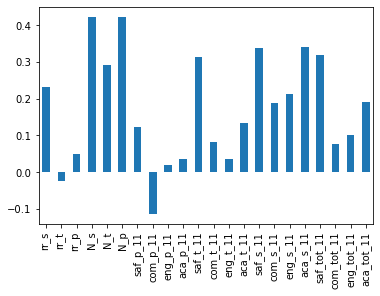

In [32]:
survey_fields.remove('DBN')
corr_plot = combined.corr()['sat_score'][survey_fields].plot.bar()

It is more interesting that `rr_s`, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

`N_s`, `N_t` and `N_p` which represents the number of students that responded, number of teachers that responded and number of parents that responded respectively, has a  high correlation with the `sat_scores`.

How students and teachers percieved safety (`saf_t_11` and `saf_s_11`) correlate with `sat_score`. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the `aca_s_11`, which indicates how the student perceives academic standards, correlates with `sat_score`, but this is not true for `aca_t_11`, how teachers perceive academic standards, or `aca_p_11`, how parents perceive academic standards.

## Exploring Safety

Above we noticed that `saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school, correlated highly with `sat_score`. Below, we'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

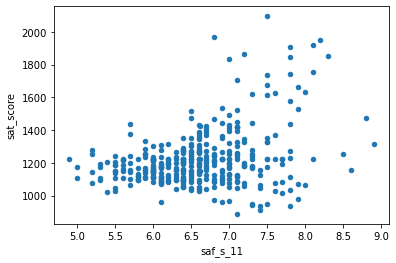

In [33]:
combined.plot.scatter('saf_s_11', 'sat_score')
plt.show()

There appears to be a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

In [34]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='l'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

# Use the pandas.DataFrame.groupby() method to group combined by school_dist.
# Use the agg() method, along with the numpy.mean function as an argument, to calculate the average of each group.
# Assign the result to the variable districts
# Use the pandas.DataFrame.reset_index() method with the keyword argument inplace=True.
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace = True)

# Convert the lon column of combined to a list, and assign it to the longitudes variable.
longitudes = districts['lon'].tolist()

# Convert the lat column of combined to a list, and assign it to the latitudes variable.
latitudes = districts['lat'].tolist()

# Call the Basemap.scatter() method on m, and pass in longitudes and latitudes as arguments.
# Make sure to pass in longitudes and latitudes in the correct order.
# Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map.
# Otherwise the method will draw the points underneath the land.
# Pass in the keyword argument s=50 to increase the size of the points in the scatterplot.
# Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates,
# rather than axis coordinates.
# Pass in the keyword argument c with the value districts["saf_s_11"] to plot the safety score of students.
# Pass in the keyword argument cmap="summer" to get the right color scheme.
m.scatter(longitudes, latitudes, s = 50, zorder = 2, latlon = True, c = districts["saf_s_11"], cmap='summer')

plt.show()

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py)

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.

## Racial differences in SAT scores

###### Let's Investigate racial differences in SAT scores.

<AxesSubplot:>

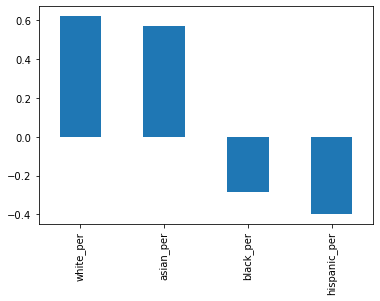

In [35]:
# Make a bar plot of the correlations between the columns above and sat_score
race_cols = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()['sat_score'][race_cols].plot.bar()

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

###### Let's Explore schools with low SAT scores and high values for hispanic_per

<AxesSubplot:xlabel='hispanic_per', ylabel='sat_score'>

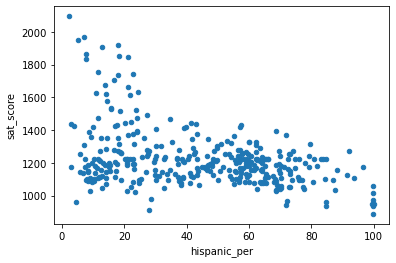

In [36]:
# Make a scatter plot of hispanic_per vs. sat_score
combined.plot.scatter('hispanic_per', 'sat_score')

The scatter plot above shows that there is negative relationship between `sat_score` and `hispanic_per` indicating that schools where there are more hispanics tend to perform badly in SAT.

##### Let's Research any schools with a hispanic_per greater than 95%

In [37]:
# But first Let's Find the school names in the data.
combined[combined['hispanic_per'] > 95]['SCHOOL NAME']

44                                MANHATTAN BRIDGES HIGH SCHOOL
82             WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS
125                         ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                       INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176            PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                                   MULTICULTURAL HIGH SCHOOL
286                      PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

###### Let's Research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800.

In [38]:
# Let's Find the school names in the data.
combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]['SCHOOL NAME']

37                                  STUYVESANT HIGH SCHOOL
151                           BRONX HIGH SCHOOL OF SCIENCE
187                         BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE
356                    STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low `hispanic_per`, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

## Gender Differences in SAT Scores

<AxesSubplot:>

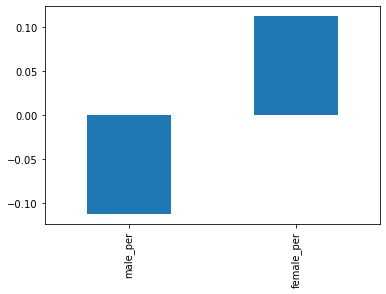

In [39]:
# Make a bar plot of the correlations between the gender columns and sat_score
gender_cols = ['male_per', 'female_per']
combined.corr()['sat_score'][gender_cols].plot.bar()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

##### Investigate schools with high SAT scores and a high female_per.

<AxesSubplot:xlabel='female_per', ylabel='sat_score'>

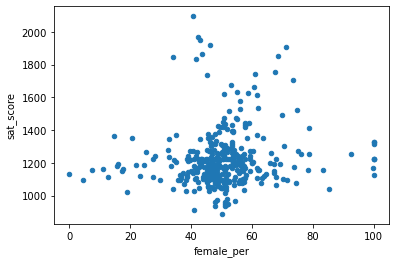

In [40]:
# Make a scatter plot of female_per vs. sat_score
combined.plot.scatter('female_per', 'sat_score')

Based on the scatterplot, there doesn't seem to be any real correlation between `sat_score` and `female_per`. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

###### Research any schools with a female_per greater than 60% and an average SAT score greater than 1700.

In [41]:
# Find the school names in the data.
combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['SCHOOL NAME']

5                                            BARD HIGH SCHOOL EARLY COLLEGE
26                                            ELEANOR ROOSEVELT HIGH SCHOOL
60                                                       BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS
302                                             TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

These schools appears to be very selective liberal arts schools that have high academic standards.

## Advanced Placement (AP) Exams vs SAT Scores

In the U.S., high school students take [Advanced Placement (AP)](https://en.wikipedia.org/wiki/Advanced_Placement_exams) exams to earn college credit. There are AP exams for many different subjects.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because `total_enrollment` is highly correlated with `sat_score`, we don't want to bias our results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

In [42]:
# Divide the AP Test Takers column by the total_enrollment column
# Assign the result to a new ap_per column
combined['ap_per'] = combined['AP Test Takers'] / combined['total_enrollment']
combined['ap_per']

0      0.305756
1      0.098985
2      0.031773
3      0.351577
4      0.158091
5      0.209123
6      0.741545
7      0.297988
8      0.376177
9      0.307945
10     0.050725
11     0.229698
12     0.093126
13     0.080128
14     0.384014
15     0.341346
16     0.260664
17     0.297988
18     0.388641
19     0.424437
20     0.528807
21     0.152798
22     0.039841
23     0.180556
24     0.196891
25     0.295938
26     0.305720
27     0.137380
28     0.306482
29     0.115385
30     0.115321
31     0.737308
32     0.570924
33     0.733118
34     0.097902
35     0.290606
36     0.036923
37     0.457992
38     0.124845
39     0.544426
40     0.061100
41     0.056922
42     0.110497
43     0.594603
44     0.123845
45     0.305033
46     0.172805
47     0.016279
48     0.109836
49     0.043777
50     0.672025
51     0.111588
52     0.062500
53     0.069735
54     0.308681
55     0.352538
56     0.455932
57     0.360416
58     0.125969
59     0.589173
60     0.142857
61     0.265259
62     0

The above output shows the percentage of students that took the advanced placement exams in each school

###### Investigate the relationship between AP scores and SAT scores.

<AxesSubplot:xlabel='ap_per', ylabel='sat_score'>

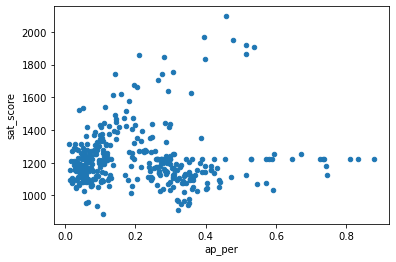

In [43]:
combined.plot.scatter('ap_per', 'sat_score')

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.

###### Let's check the correlations r value

In [44]:
combined[['ap_per', 'sat_score']].corr()

,ap_per,sat_score
ap_per,1.000000,0.057171
sat_score,0.057171,1.000000


The correlations r of `0.05` value depicts that there is a positive weak (5%) relationship between the percentage of students in schools who took the advanced placement exam and their SAT scores.